In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from simulator.helpers import SimulationParameters
from data_analysis.helpers import *

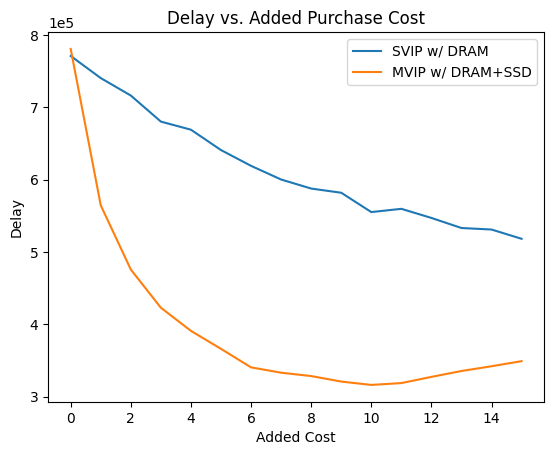

In [2]:
svip_base_dict = {
    "fwd_pol": "svip",
    "cache_pol": "svip",
    "request_rate": 20,
    "vip_win_size": 100,
    "cache_capacities": (5,),
    "cache_read_rates": (50,),
    "cache_write_rates": (50,),
    "cache_read_pens": (2,),
    "cache_write_pens": (4,),
}
svip_base_params = SimulationParameters(**svip_base_dict)
svip_cache_caps = [
    (5,),
    (6,),
    (7,),
    (8,),
    (9,),
    (10,),
    (11,),
    (12,),
    (13,),
    (14,),
    (15,),
    (16,),
    (17,),
    (18,),
    (19,),
    (20,),
]
svip_param_list = getParamList(svip_base_params, "cache_capacities", svip_cache_caps)
svip_param_hashes = getParamHashList(svip_param_list)

mvip_singletier_base_dict = svip_base_dict
(
    mvip_singletier_base_dict["fwd_pol"],
    mvip_singletier_base_dict["cache_pol"],
    mvip_singletier_base_dict["cache_read_pens"],
    mvip_singletier_base_dict["cache_write_pens"],
) = ("mvip", "mvip", (1,), (2,))

mvip_singletier_base_params = SimulationParameters(**mvip_singletier_base_dict)
mvip_singletier_param_hash = str(hash(mvip_singletier_base_params))

mvip_base_dict = {
    "fwd_pol": "mvip",
    "cache_pol": "mvip",
    "request_rate": 20,
    "vip_win_size": 100,
    "cache_capacities": (5, 100),
    "cache_read_rates": (50, 10),
    "cache_write_rates": (50, 10),
    "cache_read_pens": (2, 1),
    "cache_write_pens": (4, 2),
}

mvip_base_params = SimulationParameters(**mvip_base_dict)
mvip_cache_caps = [
    (5, 10),
    (5, 20),
    (5, 30),
    (5, 40),
    (5, 50),
    (5, 60),
    (5, 70),
    (5, 80),
    (5, 90),
    (5, 100),
    (5, 110),
    (5, 120),
    (5, 130),
    (5, 140),
    (5, 150),
]
mvip_param_list = getParamList(mvip_base_params, "cache_capacities", mvip_cache_caps)
mvip_param_hashes = getParamHashList(mvip_param_list)

svip_db = getJsonDb("/home/volkan/Repos/multi-tier/sim_outputs/svip_abilene_db.json")
svip_delay = getDataFieldSumsAcrossEntries(
    "abilene", svip_db, svip_param_hashes, "delay"
)
mvip_db = getJsonDb("/home/volkan/Repos/multi-tier/sim_outputs/mvip_abilene_db.json")
mvip_singletier_delay = singleEntrySumDataFieldAcrossNodes(
    "abilene", mvip_db[mvip_singletier_param_hash], "delay"
)
mvip_delay = [mvip_singletier_delay] + getDataFieldSumsAcrossEntries(
    "abilene", mvip_db, mvip_param_hashes, "delay"
)

cost_delta = list(range(16))

plt.plot(cost_delta, svip_delay, label="SVIP w/ DRAM")
plt.plot(cost_delta, mvip_delay, label="MVIP w/ DRAM+SSD")
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))


plt.title("Delay vs. Added Purchase Cost")
plt.xlabel("Added Cost")
plt.ylabel("Delay")

plt.legend()
plt.show()

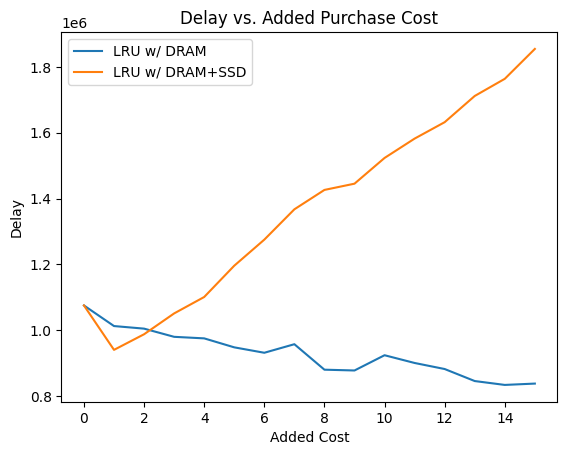

In [3]:
lru_single_base_dict = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_rate": 20,
    "vip_win_size": 100,
    "cache_capacities": (5,),
    "cache_read_rates": (50,),
    "cache_write_rates": (50,),
    "cache_read_pens": (2,),
    "cache_write_pens": (4,),
}
lru_single_base_params = SimulationParameters(**lru_single_base_dict)
lru_single_cache_caps = [
    (5,),
    (6,),
    (7,),
    (8,),
    (9,),
    (10,),
    (11,),
    (12,),
    (13,),
    (14,),
    (15,),
    (16,),
    (17,),
    (18,),
    (19,),
    (20,),
]
lru_single_param_list = getParamList(lru_single_base_params, "cache_capacities", lru_single_cache_caps)
lru_single_param_hashes = getParamHashList(lru_single_param_list)

lru_multi_base_dict = {
    "fwd_pol": "lrt",
    "cache_pol": "lru",
    "request_rate": 20,
    "vip_win_size": 100,
    "cache_capacities": (5, 100),
    "cache_read_rates": (50, 10),
    "cache_write_rates": (50, 10),
    "cache_read_pens": (2, 1),
    "cache_write_pens": (4, 2),
}

lru_multi_base_params = SimulationParameters(**lru_multi_base_dict)
lru_multi_cache_caps = [
    (5, 10),
    (5, 20),
    (5, 30),
    (5, 40),
    (5, 50),
    (5, 60),
    (5, 70),
    (5, 80),
    (5, 90),
    (5, 100),
    (5, 110),
    (5, 120),
    (5, 130),
    (5, 140),
    (5, 150),
]
lru_multi_param_list = getParamList(lru_multi_base_params, "cache_capacities", lru_multi_cache_caps)
lru_multi_param_hashes = getParamHashList(lru_multi_param_list)

lru_db = getJsonDb("/home/volkan/Repos/multi-tier/sim_outputs/lru_abilene_db.json")
lru_single_delay = getDataFieldSumsAcrossEntries(
    "abilene", lru_db, lru_single_param_hashes, "delay"
)
lru_multi_delay = [lru_single_delay[0]] + getDataFieldSumsAcrossEntries(
    "abilene", lru_db, lru_multi_param_hashes, "delay"
)

cost_delta = list(range(16))

plt.plot(cost_delta, lru_single_delay, label="LRU w/ DRAM")
plt.plot(cost_delta, lru_multi_delay, label="LRU w/ DRAM+SSD")
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))


plt.title("Delay vs. Added Purchase Cost")
plt.xlabel("Added Cost")
plt.ylabel("Delay")

plt.legend()
plt.show()